In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [6]:
# import the dataset 
car_dataset = pd.read_csv('datasets/car data.csv')

In [8]:
car_dataset.shape

(301, 9)

In [9]:
# getting some info about the dataset 

car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
 # checking number of missing values 

car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
# checking the distribution of the categorical data 

print(car_dataset.Fuel_Type.value_counts())

print(car_dataset.Seller_Type.value_counts())

print(car_dataset.Transmission.value_counts())


# clearly we can see that our data is distributed over all of the dataset

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [21]:
# now we need to encode the data categories into numbers like petrol - > 0 , diesel - > 1 etc.

car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1,'CNG':2}}, inplace = True)

car_dataset.replace({'Seller_Type':{'Dealer':0, "Individual":1}}, inplace = True)

car_dataset.replace({'Transmission':{'Manual':0, "Automatic":1}}, inplace = True)

In [22]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [26]:
# splitting the dataset 

X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis = 1)
Y = car_dataset['Selling_Price']


X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.35, random_state = 36)

In [29]:
# import the Linear Regression Model 
lin_reg_model = LinearRegression()

In [30]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [31]:
# prediction on the training data 

training_data_prediction = lin_reg_model.predict(X_train)

In [32]:
# using metrics r2 error 

err_score = metrics.r2_score(Y_train, training_data_prediction)

In [35]:
print(err_score * 100 , '% Accuracy')

88.00202285886023 % Accuracy


Text(0, 0.5, 'Predicted Price')

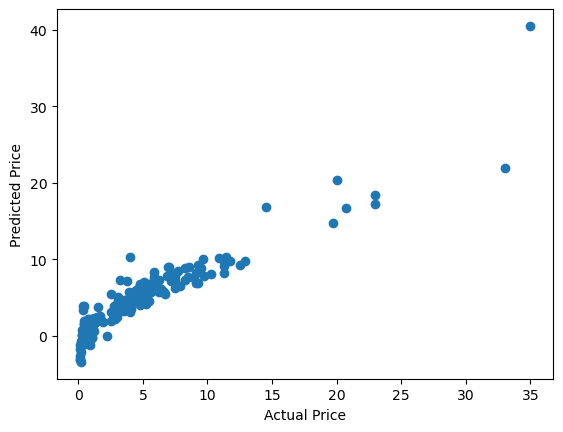

In [38]:
# visualize the actual vs predicted prices 

plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

In [40]:
# doing prediction on test data 

test_pred_results = lin_reg_model.predict(X_test)

In [41]:
# analysing the error 

err_score_test_dataset = metrics.r2_score(Y_test, test_pred_results)

In [43]:
print(err_score_test_dataset * 100, '% Accuracy ')

86.99445315917073 % Accuracy 


Text(0, 0.5, 'Predicted Pirce')

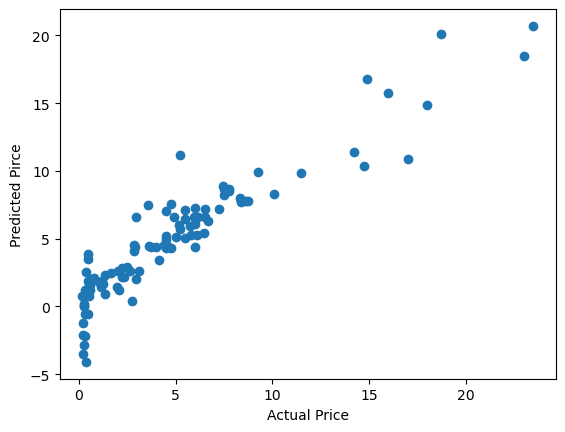

In [44]:
# plot the values

plt.scatter(Y_test, test_pred_results)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Pirce')

83.42563084892572 %


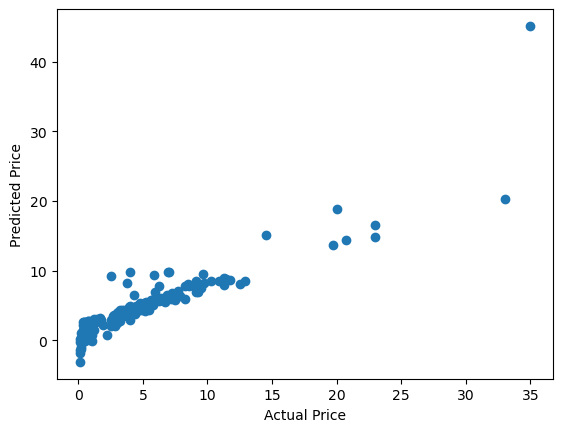

In [58]:
# using lasso regression 

lass_reg_model = Lasso()

lass_reg_model.fit(X_train, Y_train)


# prediction on training data 

training_data_prediction  = lass_reg_model.predict(X_train)

error_score = metrics.r2_score(Y_train, training_data_prediction)

print(error_score*100, '%')


plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')



test_data_prediction = lass_reg_model.predict(X_test)

err_score = metrics.r2_score(Y_test, test_data_prediction)



Text(0, 0.5, 'Predicted Price')

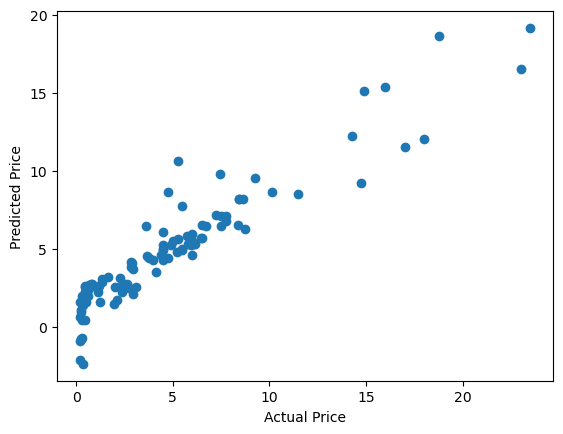

In [57]:

plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')